In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))
% precision 2
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import statsmodels.api as sm

#### Linear Regression using Boston Housing Data

We will use data about house prices in the suburbs of Boston collected in 1978 and  made [freely available](https://archive.ics.uci.edu/ml/datasets/Housing). Please make yourself familiar with the [data dictionary](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names).

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per USD10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in USD1000's

In [1]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.0063,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.0273,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.0273,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.0324,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.0691,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


##### Show the key descriptive statistics for all variables

In [2]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000
mean,3.6135,11.3636,11.1368,0.0692,0.5547,6.2846,68.5749,3.7950,9.5494,408.2372,18.4555,356.6740,12.6531,22.5328
std,8.6015,23.3225,6.8604,0.2540,0.1159,0.7026,28.1489,2.1057,8.7073,168.5371,2.1649,91.2949,7.1411,9.1971
min,0.0063,0.0000,0.4600,0.0000,0.3850,3.5610,2.9000,1.1296,1.0000,187.0000,12.6000,0.3200,1.7300,5.0000
25%,0.0820,0.0000,5.1900,0.0000,0.4490,5.8855,45.0250,2.1002,4.0000,279.0000,17.4000,375.3775,6.9500,17.0250
50%,0.2565,0.0000,9.6900,0.0000,0.5380,6.2085,77.5000,3.2074,5.0000,330.0000,19.0500,391.4400,11.3600,21.2000
75%,3.6771,12.5000,18.1000,0.0000,0.6240,6.6235,94.0750,5.1884,24.0000,666.0000,20.2000,396.2250,16.9550,25.0000
max,88.9762,100.0000,27.7400,1.0000,0.8710,8.7800,100.0000,12.1265,24.0000,711.0000,22.0000,396.9000,37.9700,50.0000


##### Take a closer look at individual variables to understand their characteristics
Try out various options such as violin plots, histograms, `.value_counts()`.

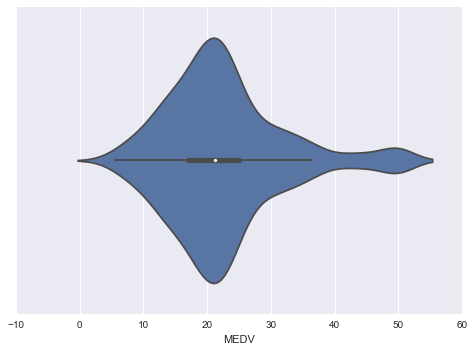

In [12]:
sns.violinplot(df.MEDV)

##### What can you learn from these metrics about the distribution of the variables?

##### Answer:

##### Standardize the data

##### Visualize the distribution of the standardized data using [sns.violinplot](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.violinplot.html#seaborn.violinplot)

##### Use [sns.pairplot](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn-pairplot) to view (selected) pairwise correlations

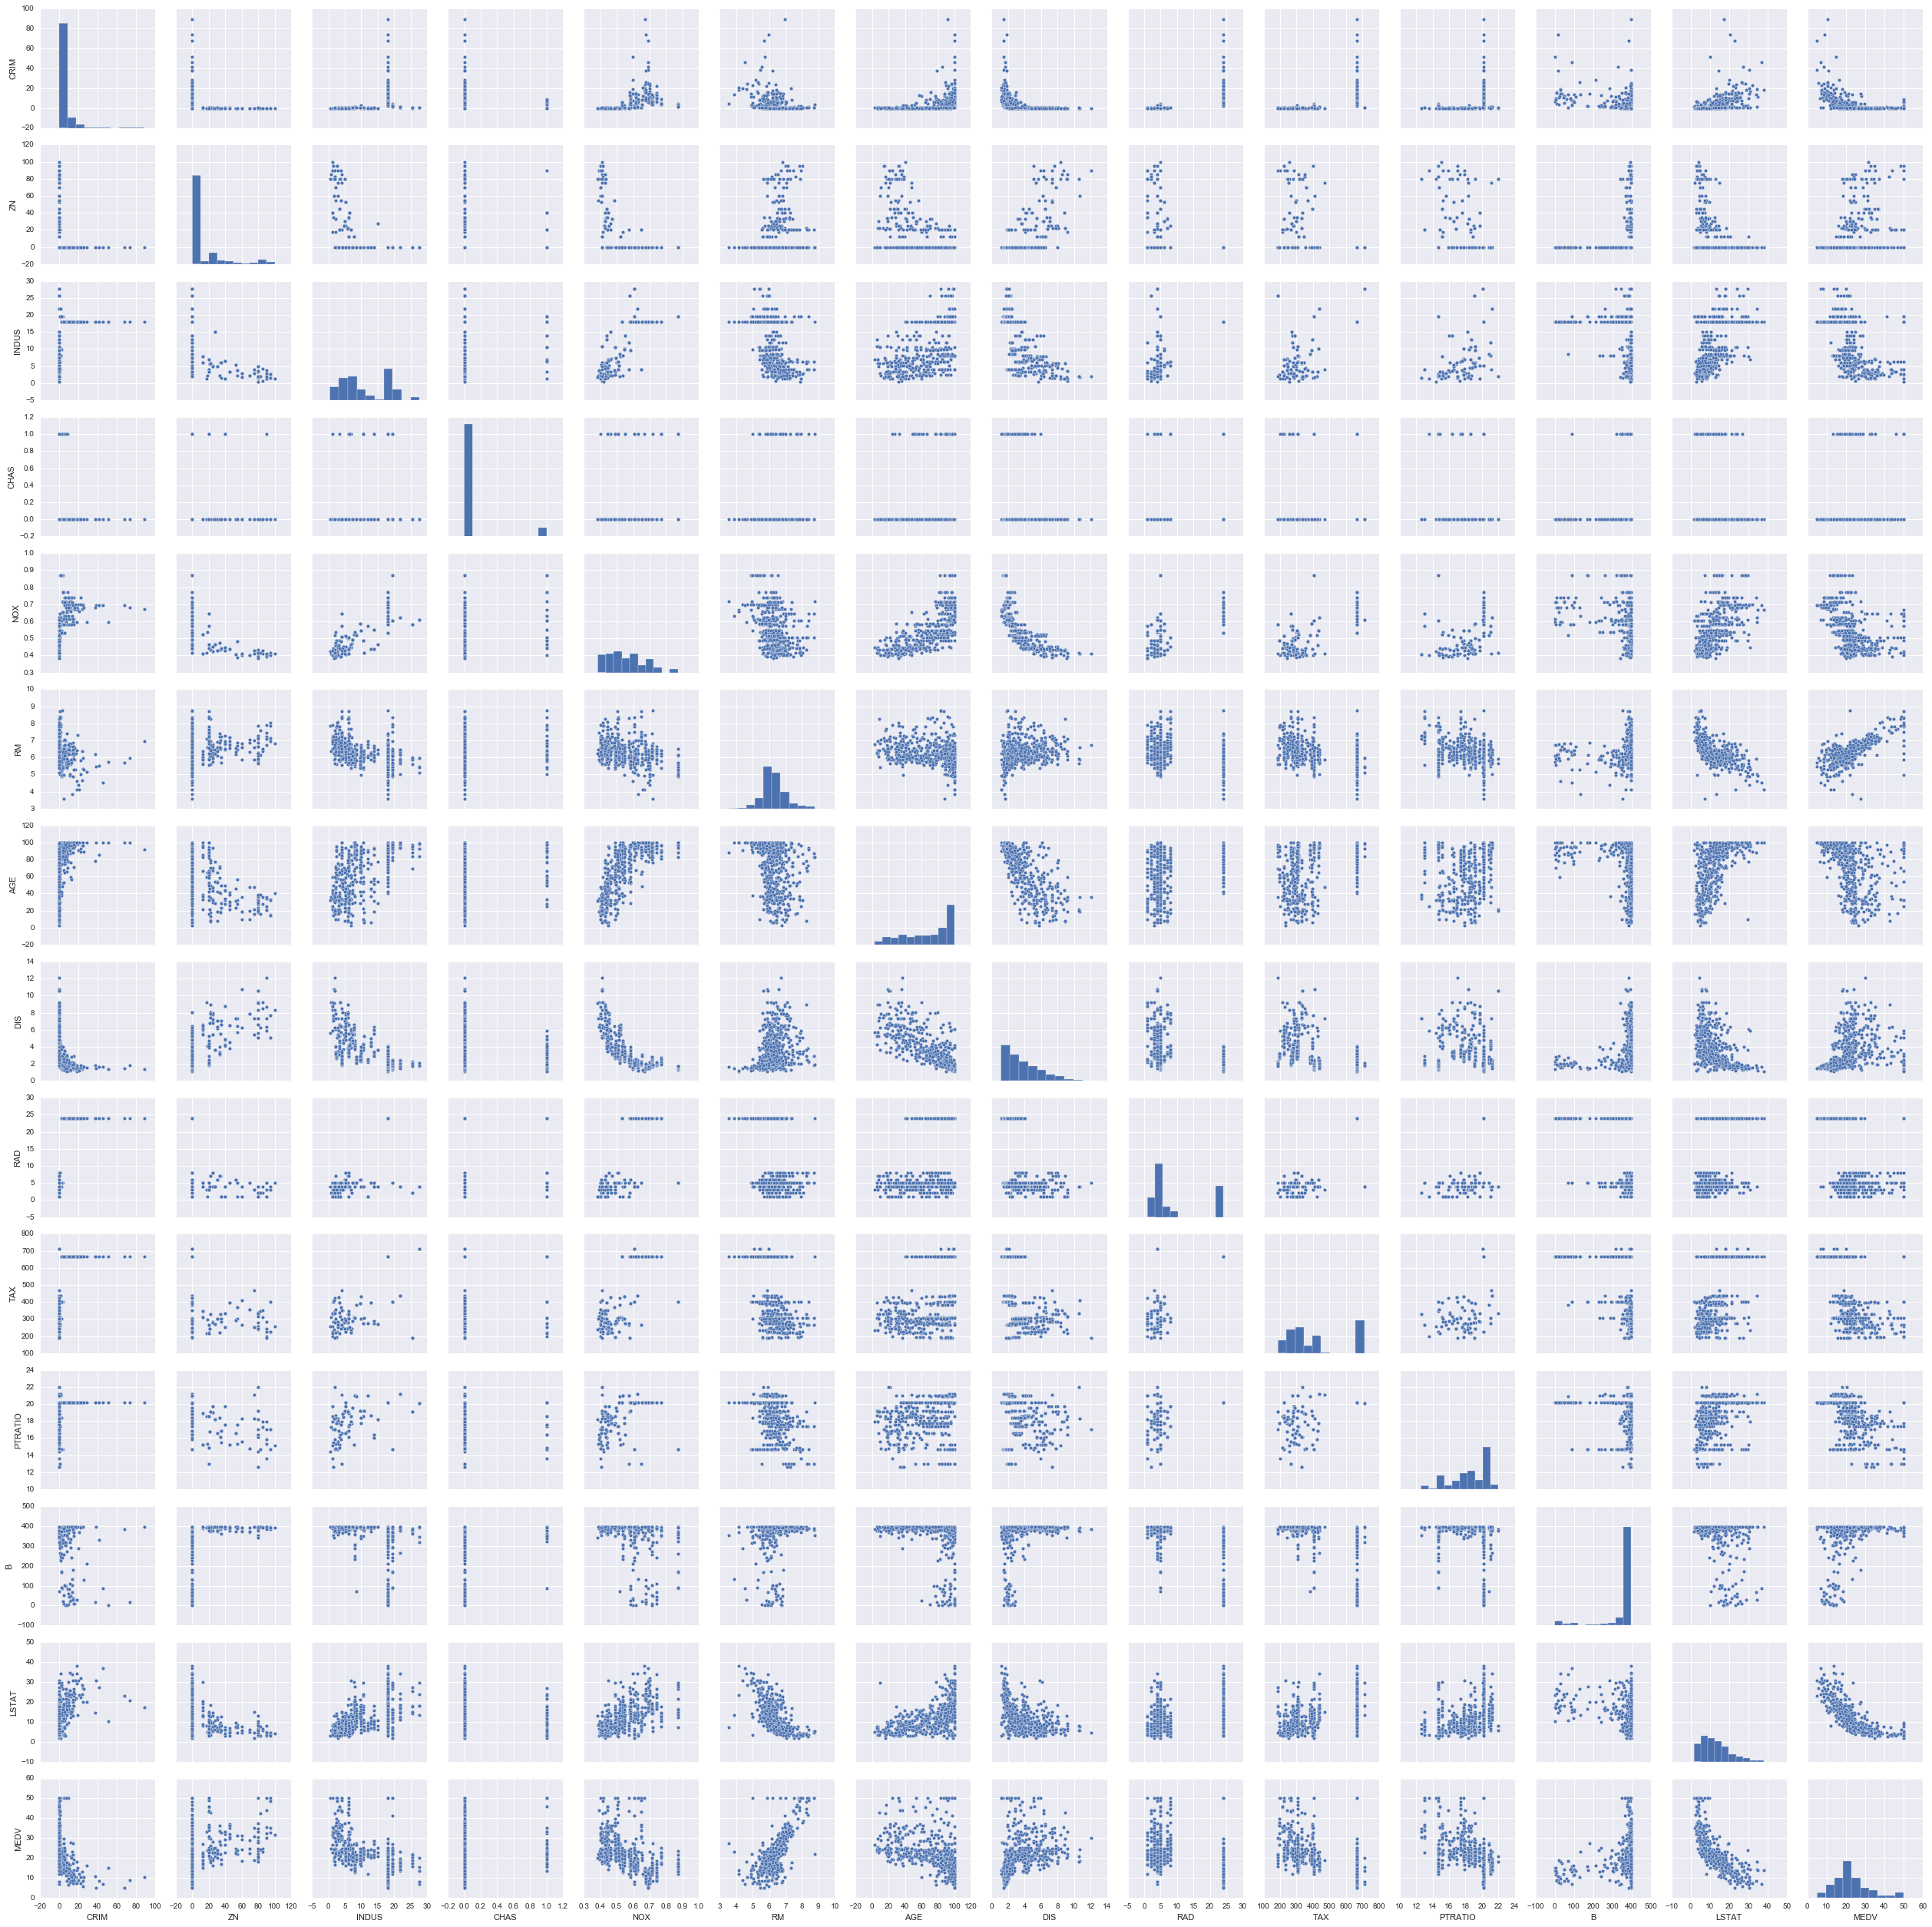

In [13]:
sns.pairplot(df);

##### Use [sns.heatmap](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.heatmap.html) to plot the correlation matrix as heatmap (see alternatives [here](https://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html) and [here](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.clustermap.html)). Make sure to show the coefficients!

##### What did you learn?

##### Run a linear regression using `statsmodels`

##### Optional: Expore [sns.coefplot](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.coefplot.html#seaborn.coefplot) for a quick visualization of the coefficients. 

##### Examine the model residuals: get key distribution metrics, plot histogram

##### Optional: explore the statsmodels [regression diagnostics](http://statsmodels.sourceforge.net/devel/examples/notebooks/generated/regression_diagnostics.html)

##### Optional: Partial Regression Analysis

##### Linear Regression using Scikit Learn 

Estimate the mean squared prediction error using sklearn & 5-fold cross validation

##### Compare with Lasso & Ridge, using 5-fold CV to optimize regularization

##### Optional: explore sklearn.linear_model.lasso_path

##### Ridge Regression: Find optimal regularization parameter and corresponding MSE score

##### Optional: Show ridge coefficient path and optimal coefficients

##### Find the optimal alpha and L1 ratio for the ElasticNet model